# ST2195 Coursework

#### Student Number : 210421794

## Question 3 : How does the number of people flying between different locations change over time?

In [1]:
# Import and load packages

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the datasets

flight2005 = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/2005.csv")
flight2006 = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/2006.csv")

airports = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/airports.csv")
carriers = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/carriers.csv")
plane_data = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/plane-data.csv")

In [3]:
# Combine the data from 2005 and 2006

flights = pd.concat([flight2005, flight2006])
flights

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141917,2006,12,29,5,1246.0,1249,1452.0,1459,DL,1675,...,6,12,0,NaN,0,0,0,0,0,0
7141918,2006,12,29,5,1225.0,1155,2033.0,1931,DL,1676,...,12,35,0,NaN,0,30,0,32,0,0
7141919,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,9,27,0,NaN,0,0,0,0,0,0
7141920,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,5,21,0,NaN,0,0,0,0,0,0


In [4]:
# Remove rows with missing values

flights.dropna(subset = ['DepTime', 'ArrTime', 'ArrDelay', 'DepDelay'], inplace = True)

In [5]:
# Re-check the null values

flights.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                     0
CRSDepTime                  0
ArrTime                     0
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime           0
CRSElapsedTime              0
AirTime                     0
ArrDelay                    0
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     13996639
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

### Assumption made :

Since we lack information about the exact number of passengers per flight, we will assume a constant number of passengers for each flight. Therefore, we will count the total number of flights for different routes to analyse this question.

In [6]:
# Creating a new column that defines the route of flights

flights['route'] = flights['Origin'] + '-' + flights['Dest']
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,route
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,23,0,NaN,0,0,0,0,0,0,BOS-ORD
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,15,0,NaN,0,0,0,0,0,0,BOS-ORD
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,18,0,NaN,0,0,0,0,0,0,BOS-ORD
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,10,0,NaN,0,0,0,0,0,0,BOS-ORD
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,10,0,NaN,0,0,0,0,0,0,ORD-BOS


### Overview

In [7]:
# Querying necessary data to analyse the total number of flights for each month in 2005

flight_count_2005 = flights[flights["Year"] == 2005].groupby(["Year", "Month"]).agg({"DepTime":"count"}).reset_index() #Count no. of flights per Month of each Year
flight_count_2005.columns = ['Year', 'Month', 'Total Flights']
flight_count_2005

,Year,Month,Total Flights
0,2005,1,568031
1,2005,2,534959
2,2005,3,606489
3,2005,4,586179
4,2005,5,608046
5,2005,6,597856
6,2005,7,612107
7,2005,8,615643
8,2005,9,561905
9,2005,10,581513


In [8]:
# Querying necessary data to analyse the total number of flights for each month in 2006

flight_count_2006 = flights[flights["Year"] == 2006].groupby(["Year", "Month"]).agg({"DepTime":"count"}).reset_index() #Count no. of flights per Month of each Year
flight_count_2006.columns = ['Year', 'Month', 'Total Flights']
flight_count_2006

,Year,Month,Total Flights
0,2006,1,570130
1,2006,2,518645
2,2006,3,596578
3,2006,4,577718
4,2006,5,594626
5,2006,6,586418
6,2006,7,608631
7,2006,8,617379
8,2006,9,573750
9,2006,10,599086


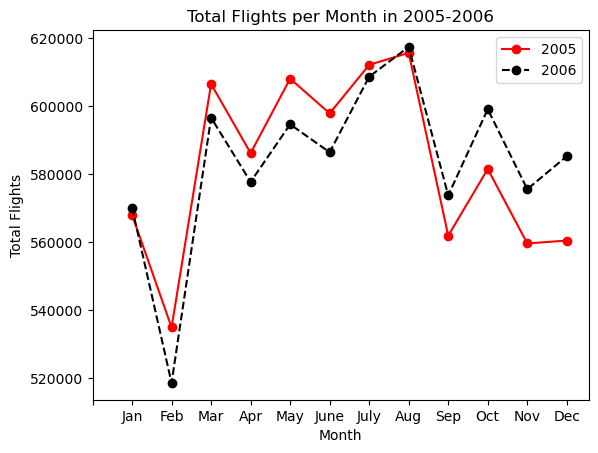

In [9]:
# Create a plot to see the number of people flying between different locations change over months in 2005 and 2006

months = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(flight_count_2005["Month"], flight_count_2005["Total Flights"], marker='o', color='red')
plt.plot(flight_count_2006["Month"], flight_count_2006["Total Flights"], marker='o', color='black', linestyle='--')
plt.legend(["2005", "2006"])
plt.xlabel("Month")
plt.ylabel("Total Flights")
plt.xticks(range(13), months)
plt.title("Total Flights per Month in 2005-2006")
plt.show()

### Analysis by Month

In [10]:
# Calculate the total number of flights for each route

route_count = flights.groupby("route").agg({"DepTime":"count"}).reset_index()
route_count.columns = ['Route', 'Total Flights']
route_count

,Route,Total Flights
0,ABE-ATL,2472
1,ABE-AVP,3
2,ABE-CLE,2115
3,ABE-CLT,721
4,ABE-CVG,2140
...,...,...
4964,YAK-CDV,705
4965,YAK-JNU,695
4966,YUM-IPL,488
4967,YUM-LAX,2234


In [11]:
# Sort route_count in descending order based on the total number of flights
route_count_sorted = route_count.sort_values(by='Total Flights', ascending=False)

# Select the top 5 routes with the highest number of total flights
top_routes = route_count_sorted.head(5)
top_routes

,Route,Total Flights
2656,LAX-SAN,29287
4208,SAN-LAX,29228
2628,LAX-LAS,25749
2542,LAS-LAX,25276
546,BOS-LGA,24291


In [12]:
# LAX-SAN

lax_san_month = flights[flights["route"] == "LAX-SAN"].groupby(["route", "Month"]).agg({"DepTime":"count"}).reset_index()
lax_san_month.columns = ['Route', 'Month', 'Total Flights']
lax_san_month

,Route,Month,Total Flights
0,LAX-SAN,1,2491
1,LAX-SAN,2,2232
2,LAX-SAN,3,2489
3,LAX-SAN,4,2358
4,LAX-SAN,5,2478
5,LAX-SAN,6,2498
6,LAX-SAN,7,2551
7,LAX-SAN,8,2595
8,LAX-SAN,9,2399
9,LAX-SAN,10,2458


In [13]:
# SAN-LAX

san_lax_month = flights[flights["route"] == "SAN-LAX"].groupby(["route", "Month"]).agg({"DepTime":"count"}).reset_index()
san_lax_month.columns = ['Route', 'Month', 'Total Flights']
san_lax_month

,Route,Month,Total Flights
0,SAN-LAX,1,2490
1,SAN-LAX,2,2233
2,SAN-LAX,3,2482
3,SAN-LAX,4,2357
4,SAN-LAX,5,2473
5,SAN-LAX,6,2495
6,SAN-LAX,7,2541
7,SAN-LAX,8,2588
8,SAN-LAX,9,2393
9,SAN-LAX,10,2448


In [14]:
# LAX-LAS

lax_las_month = flights[flights["route"] == "LAX-LAS"].groupby(["route", "Month"]).agg({"DepTime":"count"}).reset_index()
lax_las_month.columns = ['Route', 'Month', 'Total Flights']
lax_las_month

,Route,Month,Total Flights
0,LAX-LAS,1,2089
1,LAX-LAS,2,1902
2,LAX-LAS,3,2096
3,LAX-LAS,4,2157
4,LAX-LAS,5,2222
5,LAX-LAS,6,2142
6,LAX-LAS,7,2167
7,LAX-LAS,8,2216
8,LAX-LAS,9,2164
9,LAX-LAS,10,2218


In [15]:
# LAS-LAX

las_lax_month = flights[flights["route"] == "LAS-LAX"].groupby(["route", "Month"]).agg({"DepTime":"count"}).reset_index()
las_lax_month.columns = ['Route', 'Month', 'Total Flights']
las_lax_month

,Route,Month,Total Flights
0,LAS-LAX,1,2110
1,LAS-LAX,2,1919
2,LAS-LAX,3,2124
3,LAS-LAX,4,2102
4,LAS-LAX,5,2156
5,LAS-LAX,6,2077
6,LAS-LAX,7,2117
7,LAS-LAX,8,2154
8,LAS-LAX,9,2102
9,LAS-LAX,10,2148


In [16]:
# BOS-LGA

bos_lga_month = flights[flights["route"] == "BOS-LGA"].groupby(["route", "Month"]).agg({"DepTime":"count"}).reset_index()
bos_lga_month.columns = ['Route', 'Month', 'Total Flights']
bos_lga_month

,Route,Month,Total Flights
0,BOS-LGA,1,2012
1,BOS-LGA,2,1913
2,BOS-LGA,3,2145
3,BOS-LGA,4,2096
4,BOS-LGA,5,2128
5,BOS-LGA,6,2024
6,BOS-LGA,7,1935
7,BOS-LGA,8,2112
8,BOS-LGA,9,2013
9,BOS-LGA,10,2110


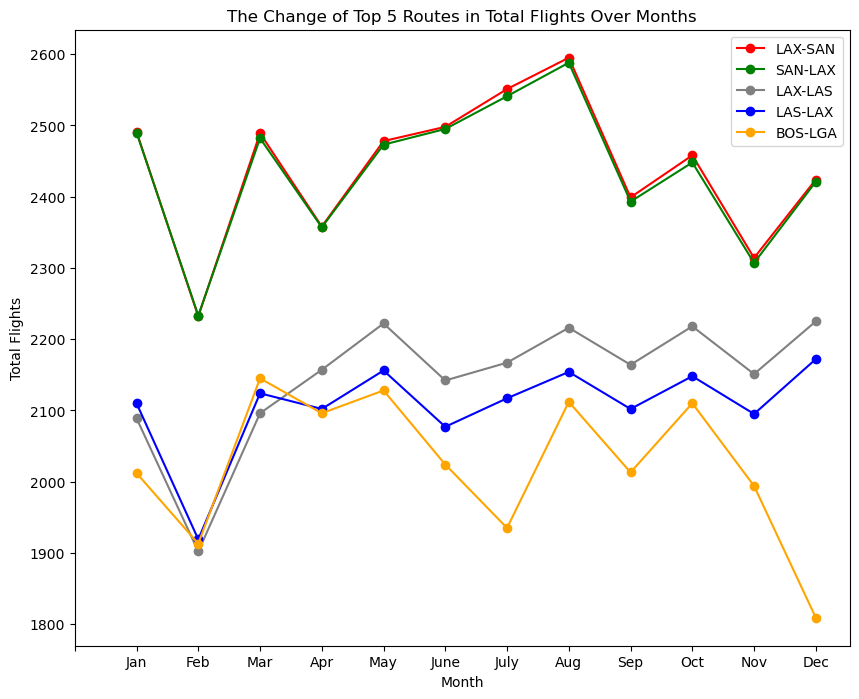

In [17]:
# Create a plot to analyze the change in the number of people flying between different locations over months

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(lax_san_month['Month'], lax_san_month['Total Flights'], label='LAX-SAN', color='red', marker='o')
ax.plot(san_lax_month['Month'], san_lax_month['Total Flights'], label='SAN-LAX', color='green', marker='o')
ax.plot(lax_las_month['Month'], lax_las_month['Total Flights'], label='LAX-LAS', color='gray', marker='o')
ax.plot(las_lax_month['Month'], las_lax_month['Total Flights'], label='LAS-LAX', color='blue', marker='o')
ax.plot(bos_lga_month['Month'], bos_lga_month['Total Flights'], label='BOS-LGA', color='orange', marker='o')

ax.legend()
ax.set_xlabel("Month")
ax.set_ylabel("Total Flights")
ax.set_xticks(range(13))
ax.set_xticklabels(['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_title("The Change of Top 5 Routes in Total Flights Over Months")

plt.show()

### Analysis by Year

In [18]:
# Querying necessary data to analyse the total number of flights for each route in 2005

route_2005 = flights[flights["Year"] == 2005].groupby(["Year", "route"]).agg({"DepTime":"count"}).reset_index()
route_2005.columns = ['Year', 'Route', 'Total Flights']
route_2005

,Year,Route,Total Flights
0,2005,ABE-ATL,1349
1,2005,ABE-AVP,1
2,2005,ABE-CLE,1048
3,2005,ABE-CLT,359
4,2005,ABE-CVG,1191
...,...,...,...
4482,2005,XNA-SLC,608
4483,2005,YAK-CDV,353
4484,2005,YAK-JNU,352
4485,2005,YUM-LAX,1210


In [19]:
# Querying necessary data to analyse the total number of flights for each route in 2006

route_2006 = flights[flights["Year"] == 2006].groupby(["Year", "route"]).agg({"DepTime":"count"}).reset_index()
route_2006.columns = ['Year', 'Route', 'Total Flights']
route_2006

,Year,Route,Total Flights
0,2006,ABE-ATL,1123
1,2006,ABE-AVP,2
2,2006,ABE-CLE,1067
3,2006,ABE-CLT,362
4,2006,ABE-CVG,949
...,...,...,...
4650,2006,YAK-CDV,352
4651,2006,YAK-JNU,343
4652,2006,YUM-IPL,488
4653,2006,YUM-LAX,1024


In [20]:
# Merge route_2005 and route_2006

route_merged = pd.merge(route_2005, route_2006, on='Route')
route_merged.columns = ['Year 2005', 'Route', 'Total Flights 2005', 'Year 2006', 'Total Flights 2006']
route_merged = route_merged.reindex(columns=['Route', 'Year 2005', 'Total Flights 2005', 'Year 2006', 'Total Flights 2006'])
route_merged

,Route,Year 2005,Total Flights 2005,Year 2006,Total Flights 2006
0,ABE-ATL,2005,1349,2006,1123
1,ABE-AVP,2005,1,2006,2
2,ABE-CLE,2005,1048,2006,1067
3,ABE-CLT,2005,359,2006,362
4,ABE-CVG,2005,1191,2006,949
...,...,...,...,...,...
4168,XNA-SLC,2005,608,2006,312
4169,YAK-CDV,2005,353,2006,352
4170,YAK-JNU,2005,352,2006,343
4171,YUM-LAX,2005,1210,2006,1024


In [21]:
route_merged ["Total Flights"] = route_merged['Total Flights 2005'] + route_merged['Total Flights 2006'] # Calculate the total number of flights in both years
route_merged ["Difference"] = route_merged['Total Flights 2006'] - route_merged['Total Flights 2005'] # Calculate the difference in the total number of flights of 2005 and 2006 
route_merged ["% Change"] = route_merged["Difference"]/route_merged["Total Flights 2005"]*100 # Calculate the percentage difference
route_merged

,Route,Year 2005,Total Flights 2005,Year 2006,Total Flights 2006,Total Flights,Difference,% Change
0,ABE-ATL,2005,1349,2006,1123,2472,-226,-16.753150
1,ABE-AVP,2005,1,2006,2,3,1,100.000000
2,ABE-CLE,2005,1048,2006,1067,2115,19,1.812977
3,ABE-CLT,2005,359,2006,362,721,3,0.835655
4,ABE-CVG,2005,1191,2006,949,2140,-242,-20.319060
...,...,...,...,...,...,...,...,...
4168,XNA-SLC,2005,608,2006,312,920,-296,-48.684211
4169,YAK-CDV,2005,353,2006,352,705,-1,-0.283286
4170,YAK-JNU,2005,352,2006,343,695,-9,-2.556818
4171,YUM-LAX,2005,1210,2006,1024,2234,-186,-15.371901


In [22]:
# Sort route_count in descending order based on the total number of flights
route_merged_sorted = route_merged.sort_values(by='Total Flights', ascending=False)

# Select the top 5 routes with the highest number of total flights
top_5_routes = route_merged_sorted.head(5)
top_5_routes

,Route,Year 2005,Total Flights 2005,Year 2006,Total Flights 2006,Total Flights,Difference,% Change
2240,LAX-SAN,2005,15007,2006,14280,29287,-727,-4.844406
3539,SAN-LAX,2005,14972,2006,14256,29228,-716,-4.782260
2217,LAX-LAS,2005,12367,2006,13382,25749,1015,8.207326
2141,LAS-LAX,2005,12340,2006,12936,25276,596,4.829822
460,BOS-LGA,2005,12487,2006,11804,24291,-683,-5.469688


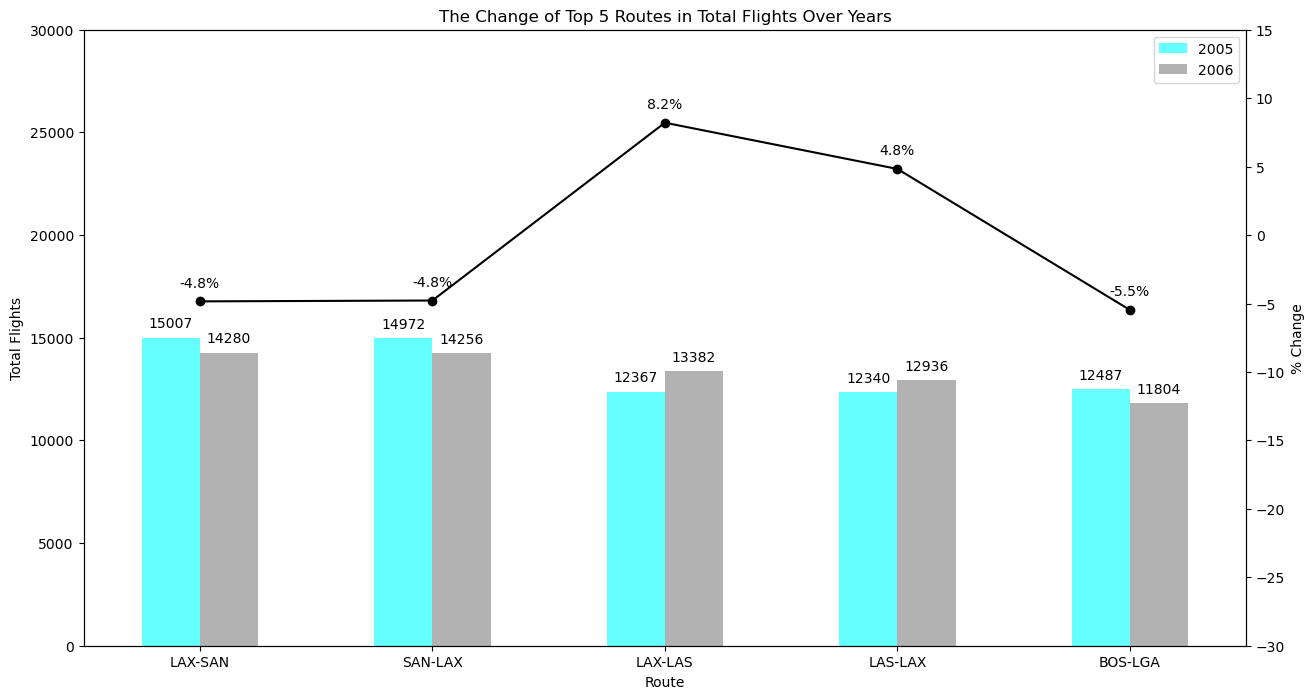

In [23]:
# Create a plot to analyse the change in the total number of flights in 2005 and 2006 for the 5 routes

fig, ax = plt.subplots(figsize=(15, 8))

top_5_routes.plot.bar(x='Route', y=['Total Flights 2005', 'Total Flights 2006'], rot=0, alpha=0.6, ax=ax, color=['cyan', 'gray'])

ax2 = ax.twinx()
ax2.plot(top_5_routes['Route'], top_5_routes['% Change'], marker='o', color='black')
ax2.set_ylim(-30, 15)
ax2.set_ylabel('% Change')

ax.set_xlabel('Route')
ax.set_ylabel('Total Flights')
ax.set_ylim(top = 30000)
ax.set_title('The Change of Top 5 Routes in Total Flights Over Years')
ax.legend(labels=['2005', '2006'])


for patch in ax.containers:
    for bar in patch:
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        label = '{:.0f}'.format(y)
        ax.annotate(label, (x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

for i, row in top_5_routes.iterrows():
    x = row['Route']
    y = row['% Change']
    ax2.annotate(f'{y:.1f}%', (x, y), xytext=(0, 8), textcoords='offset points', ha='center', va='bottom', color='black')

plt.show()